In [1]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_data_with_names(file_path):
    """
    Load data from a file and associate each row with its corresponding name.

    Parameters:
        file_path (str): Path to the file.

    Returns:
        dict: A dictionary where keys are row names and values are the corresponding data arrays.
    """
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Initialize the dictionary to store data
    data_dict = {}

    # Iterate through the lines to extract names and data
    for i in range(len(lines)):
        line = lines[i].strip()
        if line.startswith("#"):  # Check if the line starts with '#'
            # Extract the name (remove the '#' and strip whitespace)
            row_name = line[1:].strip()
            # The next line contains the numerical data
            if i + 1 < len(lines):
                data = list(map(float, lines[i + 1].strip().split()))
                data_dict[row_name] = data

    return data_dict

Model M5

In [3]:
file_path = "/home/adriana/python/galIMF/simulation_results_from_galaxy_evol/imfKroupaSTF0.5alpha2.35SFR0.1SFEN9Z_0-15.98/chemical_and_SN_evolution.txt"
data = load_data_with_names(file_path)

# Access specific rows by name
logNO = data['Stellar mass-weighted [N/O]:']
logOH = data['Stellar mass-weighted [O/H]:']
logCO = data['Stellar mass-weighted [C/O]:']
timestep = data['time step list:']
sfh = np.loadtxt("SFH.txt")

In [4]:
#plot sfh
time = np.linspace(0, max(timestep), sfh.size)/1e9

# plt.rc('font', family='serif')
# plt.figure(figsize=(8, 6))
# plt.plot(time, sfh, color='k', lw=0.8)
# plt.xlabel('Time (Gyr)', fontsize=14)
# plt.ylabel('SFR (M$_\odot$ yr$^{-1}$)', fontsize=14)
# plt.title('Star Formation History', fontsize=16)

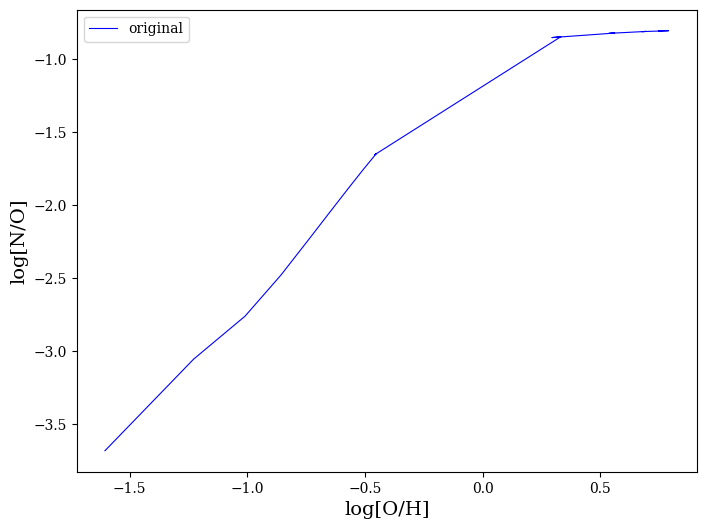

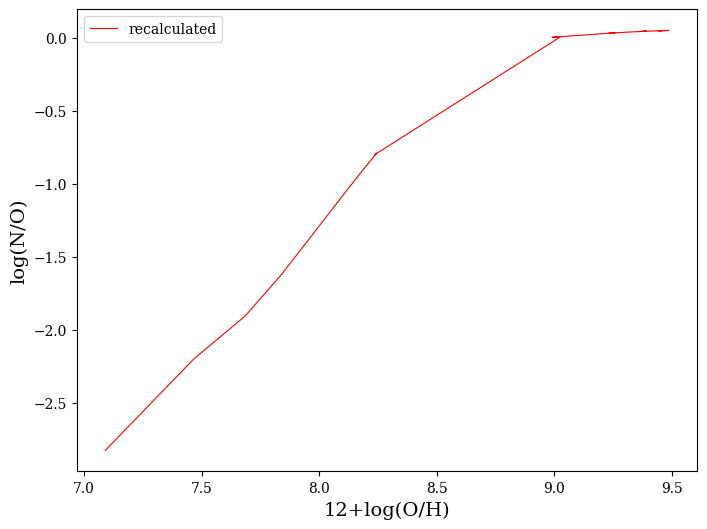

In [5]:
plt.rc('font', family='serif')
plt.figure(figsize=(8, 6))
plt.plot(logOH[3:], logNO[3:], color='b', lw=0.8, label='original')
plt.xlabel('log[O/H]', fontsize=14)
plt.ylabel('log[N/O]', fontsize=14)
plt.legend()
plt.savefig('logOH_logNO.png', dpi=300)
plt.show()
plt.figure(figsize=(8, 6))
logNOrec = [i + 0.86 for i in logNO]
logOHrec = [i +8.696 for i in logOH]
plt.plot(logOHrec[3:], logNOrec[3:], color='r', lw=0.8, label='recalculated')
plt.xlabel('12+log(O/H)', fontsize=14)
plt.ylabel('log(N/O)', fontsize=14)
plt.legend()
plt.savefig('logOH_logNO_recalculated.png', dpi=300)

In [6]:
# plot log(C/O)-12+log(O/H)

# plt.rc('font', family='serif')
# plt.figure(figsize=(8, 6))
# logCOrec = [i + 0.26 for i in logNO]
# plt.plot(logOHrec[3:], logCOrec[3:], color='k', lw=0.8, label='recalculated')
# plt.xlabel('12+log(O/H)', fontsize=14)
# plt.ylabel('log(C/O)', fontsize=14)
# plt.legend()
# plt.savefig('logOH_logNO_recalculated.png', dpi=300)

Model M1

In [7]:
# paths to the files and load data

# outflow=None
pathstf009 = "/home/adriana/python/galIMF/simulation_results_from_galaxy_evol/imfKroupaSTF0.09alpha1.55SFR0.1SFEN0.96Z_0-4.15/chemical_and_SN_evolution.txt"
pathstf012 = "/home/adriana/python/galIMF/simulation_results_from_galaxy_evol/imfKroupaSTF0.12alpha1.55SFR0.1SFEN0.66Z_0-4.15/chemical_and_SN_evolution.txt"
pathstf015 = "/home/adriana/python/galIMF/simulation_results_from_galaxy_evol/imfKroupaSTF0.15alpha1.55SFR0.1SFEN0.66Z_0-4.15/chemical_and_SN_evolution.txt"
pathstf018 = "/home/adriana/python/galIMF/simulation_results_from_galaxy_evol/imfKroupaSTF0.18alpha1.55SFR0.1SFEN0.66Z_0-4.15/chemical_and_SN_evolution.txt"
pathstf024 = "/home/adriana/python/galIMF/simulation_results_from_galaxy_evol/imfKroupaSTF0.24alpha1.55SFR0.1SFEN0.66Z_0-4.15/chemical_and_SN_evolution.txt"

stf009 = load_data_with_names(pathstf009)
stf012 = load_data_with_names(pathstf012)
stf015 = load_data_with_names(pathstf015)
stf018 = load_data_with_names(pathstf018)
stf024 = load_data_with_names(pathstf024)

# outflow=100
pathstf009out = "/home/adriana/python/galIMF/simulation_results_from_galaxy_evol/imfKroupaSTF0.09alpha1.55SFR0.1SFEN0.66Z_0-4.15outflow100/chemical_and_SN_evolution.txt"
pathstf012out = "/home/adriana/python/galIMF/simulation_results_from_galaxy_evol/imfKroupaSTF0.12alpha1.55SFR0.1SFEN0.66Z_0-4.15outflow100/chemical_and_SN_evolution.txt"
pathstf015out = "/home/adriana/python/galIMF/simulation_results_from_galaxy_evol/imfKroupaSTF0.15alpha1.55SFR0.1SFEN0.66Z_0-4.15outflow100/chemical_and_SN_evolution.txt"
pathstf018out = "/home/adriana/python/galIMF/simulation_results_from_galaxy_evol/imfKroupaSTF0.18alpha1.55SFR0.1SFEN0.66Z_0-4.15outflow100/chemical_and_SN_evolution.txt"

stf009out = load_data_with_names(pathstf009out)
# stf012out = load_data_with_names(pathstf012out)
# stf015out = load_data_with_names(pathstf015out)
# stf018out = load_data_with_names(pathstf018out)


In [8]:
# functions

# recalculate axes
def recalculate(logNO, logOH):
    logNO = [i + 0.86 for i in logNO]
    logOH = [i + 8.696 for i in logOH]
    return logNO, logOH

# polynomial fit
def fit(logOH, logNO):
    coefficients = np.polyfit(logOH, logNO, deg=6)  # Degree 3 polynomial
    polynomial = np.poly1d(coefficients)
    # Generate smooth points
    smooth_logOH = np.linspace(min(logOH[6:]), max(logOH[6:]), 500)
    smooth_logNO = polynomial(smooth_logOH)
    return smooth_logOH, smooth_logNO

In [9]:
# save data to variable and recalculate axes

# outflow=None
logNOstf009 = stf009['Gas [N/O]:']
logOHstf009 = stf009['Gas [O/H]:']
logNOstf009, logOHstf009 = recalculate(logNOstf009, logOHstf009)

logNOstf012 = stf012['Gas [N/O]:']
logOHstf012 = stf012['Gas [O/H]:']
logNOstf012, logOHstf012 = recalculate(logNOstf012, logOHstf012)

logNOstf015 = stf015['Gas [N/O]:']
logOHstf015 = stf015['Gas [O/H]:']
logNOstf015, logOHstf015 = recalculate(logNOstf015, logOHstf015)

logNOstf018 = stf018['Gas [N/O]:']
logOHstf018 = stf018['Gas [O/H]:']
logNOstf018, logOHstf018 = recalculate(logNOstf018, logOHstf018)

logNOstf024 = stf024['Gas [N/O]:']
logOHstf024 = stf024['Gas [O/H]:']
logNOstf024, logOHstf024 = recalculate(logNOstf024, logOHstf024)

# outflow=100
logNOstf009out = stf009out['Gas [N/O]:']
logOHstf009out = stf009out['Gas [O/H]:']
logNOstf009out, logOHstf009out = recalculate(logNOstf009out, logOHstf009out)

# logNOstf012out = stf012out['Gas [N/O]:']
# logOHstf012out = stf012out['Gas [O/H]:']
# logNOstf012out, logOHstf012out = recalculate(logNOstf012out, logOHstf012out)

# logNOstf015out = stf015out['Gas [N/O]:']
# logOHstf015out = stf015out['Gas [O/H]:']
# logNOstf015out, logOHstf015out = recalculate(logNOstf015out, logOHstf015out)

# logNOstf018out = stf018out['Gas [N/O]:']
# logOHstf018out = stf018out['Gas [O/H]:']
# logNOstf018out, logOHstf018out = recalculate(logNOstf018out, logOHstf018out)

In [10]:
# Load the CSV file
patha115 = "/home/adriana/python/galIMF/Bekki paper stolen plots/alpha115.csv"
patha155 = "/home/adriana/python/galIMF/Bekki paper stolen plots/alpha155.csv"
patha235 = "/home/adriana/python/galIMF/Bekki paper stolen plots/alpha235.csv"
pathdwarf = "/home/adriana/python/galIMF/Bekki paper stolen plots/dwarf.csv"

a115 = np.loadtxt(patha115, delimiter=',')
a155 = np.loadtxt(patha155, delimiter=',')
a235 = np.loadtxt(patha235, delimiter=',')
dwarf = np.loadtxt(pathdwarf, delimiter=',')

BlogOHa115 = a115[:, 0]
BlogNOa115 = a115[:, 1]
BlogOHa155 = a155[:, 0]
BlogNOa155 = a155[:, 1]
BlogOHa235 = a235[:, 0]
BlogNOa235 = a235[:, 1]
BlogOHdwarf = dwarf[:, 0]
BlogNOdwarf = dwarf[:, 1]

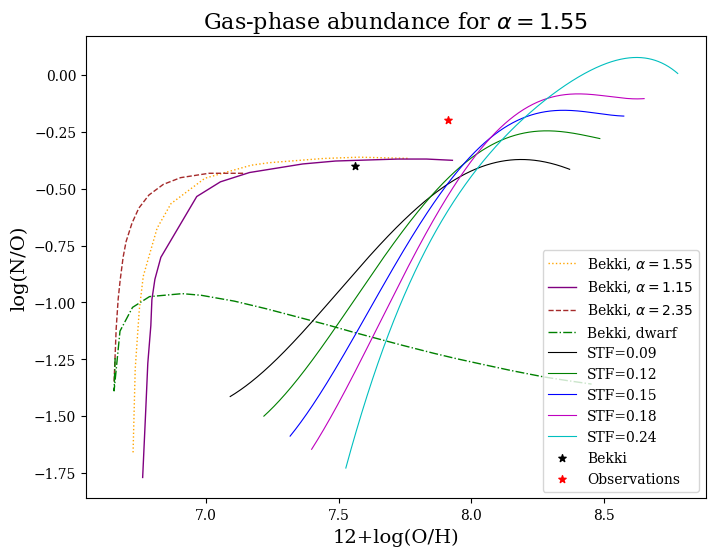

In [11]:
plt.rc('font', family='serif') # set font to LaTeX look-alike :)
# plt.figure(figsize=(8, 6))
# plt.plot(logOHm3, logNOm3, color='b', lw=0.8, label='original')
# plt.xlabel('log[O/H]', fontsize=14)
# plt.ylabel('log[N/O]', fontsize=14)
# plt.legend()
# plt.savefig('logOH_logNO.png', dpi=300)
# plt.show()

# outflow=None
smooth_logOHstf009, smooth_logNOstf009 = fit(logOHstf009, logNOstf009)
smooth_logOHstf012, smooth_logNOstf012 = fit(logOHstf012, logNOstf012)
smooth_logOHstf015, smooth_logNOstf015 = fit(logOHstf015, logNOstf015)
smooth_logOHstf018, smooth_logNOstf018 = fit(logOHstf018, logNOstf018)
smooth_logOHstf024, smooth_logNOstf024 = fit(logOHstf024, logNOstf024)

# outflow=100
smooth_logOHstf009out, smooth_logNOstf009out = fit(logOHstf009out, logNOstf009out)
# smooth_logOHstf012out, smooth_logNOstf012out = fit(logOHstf012out, logNOstf012out)
# smooth_logOHstf015out, smooth_logNOstf015out = fit(logOHstf015out, logNOstf015out)
# smooth_logOHstf018out, smooth_logNOstf018out = fit(logOHstf018out, logNOstf018out)


plt.figure(figsize=(8, 6))
#plt.plot(logOHstf015[6:], logNOstf015[6:], color='r', lw=0.8, label='recalculated')
plt.plot(BlogOHa155, BlogNOa155, color='orange', lw=1, label='Bekki, $\\alpha=1.55$', linestyle=':')
plt.plot(BlogOHa115, BlogNOa115, color='purple', lw=1, label='Bekki, $\\alpha=1.15$', linestyle='-')
plt.plot(BlogOHa235, BlogNOa235, color='brown', lw=1, label='Bekki, $\\alpha=2.35$', linestyle='--')
plt.plot(BlogOHdwarf, BlogNOdwarf, color='green', lw=1, label='Bekki, dwarf', linestyle='-.')
plt.plot(smooth_logOHstf009, smooth_logNOstf009, color='k', lw=0.8, label='STF=0.09')
plt.plot(smooth_logOHstf012, smooth_logNOstf012, color='g', lw=0.8, label='STF=0.12')
plt.plot(smooth_logOHstf015, smooth_logNOstf015, color='b', lw=0.8, label='STF=0.15')
plt.plot(smooth_logOHstf018, smooth_logNOstf018, color='m', lw=0.8, label='STF=0.18')
plt.plot(smooth_logOHstf024, smooth_logNOstf024, color='c', lw=0.8, label='STF=0.24')
# plt.plot(smooth_logOHstf009out, smooth_logNOstf009out, color='k', lw=0.8, label='STF=0.09, outflow=100', linestyle='--')
# plt.plot(smooth_logOHstf012out, smooth_logNOstf012out, color='g', lw=0.8, label='STF=0.12 outflow=100', linestyle='--')
# plt.plot(smooth_logOHstf015out, smooth_logNOstf015out, color='b', lw=0.8, label='STF=0.15 outflow=100', linestyle='--')
# plt.plot(smooth_logOHstf018out, smooth_logNOstf018out, color='m', lw=0.8, label='STF=0.18 outflow=100', linestyle='--')
plt.scatter(7.559841776058438, -0.4, color='black', label='Bekki', s=30, marker='*')
plt.scatter(7.91, -0.2, color='red', label='Observations', s=30, marker='*')
plt.xlabel('12+log(O/H)', fontsize=14)
plt.ylabel('log(N/O)', fontsize=14)
plt.title('Gas-phase abundance for $\\alpha=1.55$', fontsize=16)
plt.legend()
plt.savefig('logOH-logNO_STFcomparison.png', dpi=300)